In [37]:
# pip install xarray

In [38]:
#pip install matplotlib

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np


In [49]:
data_precip = xr.open_dataset("../Data/data_accum.nc")
data_temp = xr.open_dataset("../Data/data_instant.nc")
data_precip

<xarray.Dataset> Size: 331kB
Dimensions:     (valid_time: 672, latitude: 13, longitude: 9)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 5kB 2025-02-01 ... 2025-02-28T23:...
  * latitude    (latitude) float64 104B 49.0 48.75 48.5 ... 46.5 46.25 46.0
  * longitude   (longitude) float64 72B -122.0 -121.8 -121.5 ... -120.2 -120.0
    expver      (valid_time) <U4 11kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 314kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-06T21:07 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
print(data_precip["tp"])

<xarray.DataArray 'tp' (valid_time: 672, latitude: 13, longitude: 9)> Size: 314kB
[78624 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 5kB 2025-02-01 ... 2025-02-28T23:...
  * latitude    (latitude) float64 104B 49.0 48.75 48.5 ... 46.5 46.25 46.0
  * longitude   (longitude) float64 72B -122.0 -121.8 -121.5 ... -120.2 -120.0
    expver      (valid_time) <U4 11kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      117
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                   

In [46]:
data_precip.sel(valid_time = "2025-02-01")
aggregate = data_precip.groupby('longitude').sum(dim = "valid_time")
aggregate

<xarray.Dataset> Size: 652B
Dimensions:    (latitude: 13, longitude: 9)
Coordinates:
    number     int64 8B 0
  * latitude   (latitude) float64 104B 49.0 48.75 48.5 48.25 ... 46.5 46.25 46.0
  * longitude  (longitude) float64 72B -122.0 -121.8 -121.5 ... -120.2 -120.0
Data variables:
    tp         (latitude, longitude) float32 468B 0.1939 0.2073 ... 0.0425
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-06T21:07 GRIB to CDM+CF via cfgrib-0.9.1...

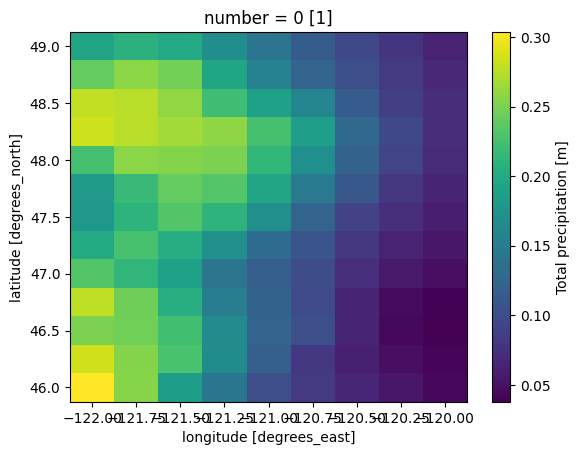

In [47]:
aggregate["tp"].plot()

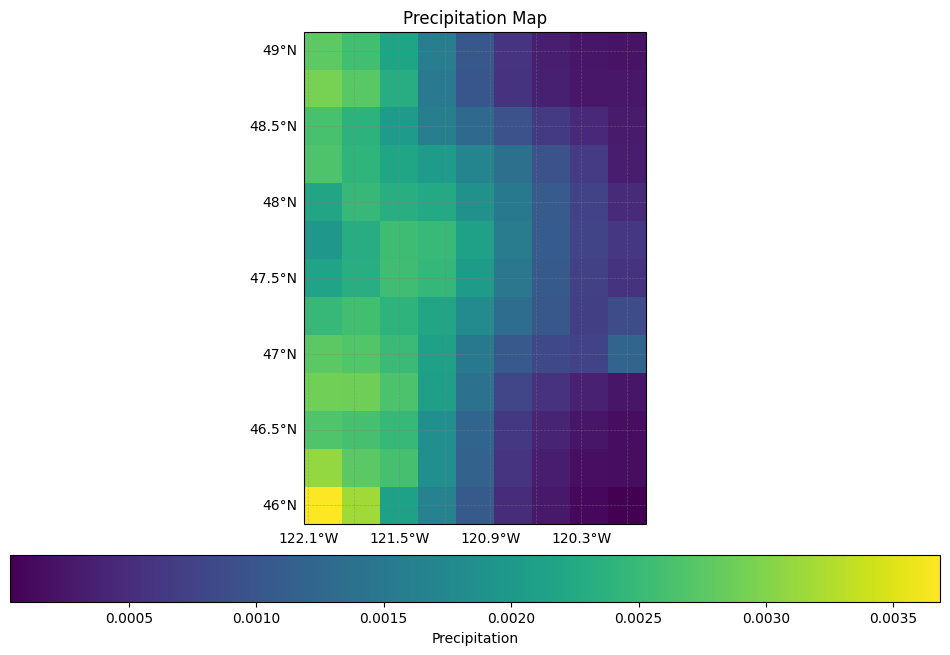

In [ ]:
data_precip_var = data_precip['tp']
longitude_var = data_precip['longitude']
latitude_var = data_precip['latitude']

data_to_plot = data_precip_var.isel(valid_time=0)
data_to_plot

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
lon_2d, lat_2d = np.meshgrid(longitude_var, latitude_var)
im = ax.pcolormesh(lon_2d, lat_2d, data_to_plot, transform=ccrs.PlateCarree(), cmap='viridis')
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label("Precipitation")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax.set_title('Precipitation Map')
plt.show()

In [40]:
print(data_precip.dims)
print(data_precip.dims['latitude'])

FrozenMappingWarningOnValuesAccess({'valid_time': 672, 'latitude': 13, 'longitude': 9})
13


/var/folders/pr/qz3c0jc146355ryds4n93wjm0000gn/T/ipykernel_49150/1450420682.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(data_precip.dims['latitude'])


In [42]:
print(data_precip.data_vars)
print(data_precip.data_vars['tp'])

Data variables:
    tp       (valid_time, latitude, longitude) float32 314kB ...
<xarray.DataArray 'tp' (valid_time: 672, latitude: 13, longitude: 9)> Size: 314kB
[78624 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 5kB 2025-02-01 ... 2025-02-28T23:...
  * latitude    (latitude) float64 104B 49.0 48.75 48.5 ... 46.5 46.25 46.0
  * longitude   (longitude) float64 72B -122.0 -121.8 -121.5 ... -120.2 -120.0
    expver      (valid_time) <U4 11kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      117
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:

In [44]:
desired_date = "2025-02-01"
data_for_desired_date = data_precip.sel(valid_time = desired_date)
print(data_for_desired_date)

<xarray.Dataset> Size: 12kB
Dimensions:     (valid_time: 24, latitude: 13, longitude: 9)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2025-02-01 ... 2025-02-01T23...
  * latitude    (latitude) float64 104B 49.0 48.75 48.5 ... 46.5 46.25 46.0
  * longitude   (longitude) float64 72B -122.0 -121.8 -121.5 ... -120.2 -120.0
    expver      (valid_time) <U4 384B ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 11kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-06T21:07 GRIB to CDM+CF via cfgrib-0.9.1...
